<a id="contents"></a>
# Inferential Statistics

**[INDEX](#contents)**
- [Binomial Distribution](#bi_dis)
- [Law of Large Numbers](#lln)
- [Central Limit Theorem](#cll)
- [Sampling Distribution](#sa_dis)
- [Conditional Probability](#cd_prob)
- [Bayes Rules](#by_rule)

<a id="bi_dis"></a>
## Binomial Distribution

**1. Factorial Number**

$
\begin{align}
n! = n\cdot(n-1)\cdot(n-2)\cdot(n-3) \cdots \cdot3\cdot2\cdot1
\end{align}
$

**2. Permutation Number**

$
\begin{align}
A_m^n = \frac{m!}{(m-n)!}
\end{align}
$

**3. Combinatorial Number**

$
\begin{align}
C_m^n = \frac{A_m^n}{n!} = \frac{m!}{n!(m-n)!}
\end{align}
$

where **`n`** is the number of events, **`x`** is the number of "successes", and **`p`** is the probability of "success".

**4. Binomial Distribution (Or Probability Mass Function (PMF) asssociated with binomial distribution)**

$
\begin{align}
P(X=x) = \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}
\end{align}
$

In [4]:
# 计算阶乘
def factorial(n):
    if n < 2:
        return 1
    else:
        return n*factorial(n-1)

# 计算组合数
def combo(m, n):
    return int(factorial(m)/(factorial(n)*factorial(m-n)))

# 计算排列数
def permu(m, n):
    return int(factorial(m)/factorial(m-n))

# 计算二项式概率
def biNom(m, n, p):
    return combo(m, n)*p**n*(1-p)**(m-n)

In [7]:
# Flip a coin 125 times, get 3 heads
combo(125, 3)

317750

In [8]:
# Flip a fair coin 5 times, possibility of getting 1 head
biNom(5, 1, .5)

0.15625

In [9]:
# Flip a fair coin 5 times, possibility of getting 3 heads
biNom(5, 3, .5)

0.3125

In [10]:
# Flip a LOADED coin 3 times, possibility of getting 1 head. (P(Head) = 0.8)
biNom(3, 1, .8)

0.09599999999999996

In [13]:
# Flip a LOADED coin 5 times, possibility of getting 4 heads. (P(Head) = 0.8)
print(biNom(5, 4, .8))

# Flip a LOADED coin 5 times, possibility of getting 3 heads. (P(Head) = 0.8)
print(biNom(5, 3, .8))

# Flip a LOADED coin 12 times, possibility of getting 9 heads. (P(Head) = 0.8)
print(biNom(12, 9, .8))

# Flip a LOADED coin 5 times, possibility of getting 3 heads. (P(Head) = 0.8)
# print(biNom(5, 3, .8))

0.4096
0.20479999999999993
0.23622320128


[Back](#contents)

<a id='lln'></a>
## Law of Large Numbers Example

Demonstrate what the `Law of Large Numbers` is like. 

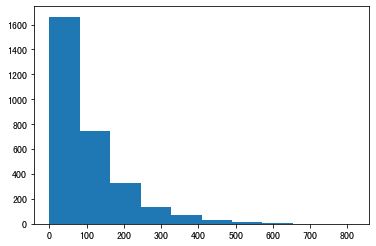

In [124]:
np.random.seed(42)

pop_data = np.random.gamma(1,100,3000)
plt.hist(pop_data);

`1.` What is the the number of data values in our population dataset?

In [125]:
data_size = len(pop_data)
data_size

3000

`2.` What is the population mean?

In [126]:
mean_pop = pop_data.mean()
mean_pop

100.35978700795846

`3.` Use numpy's **random.choice** to simulate 5 draws from the `pop_data` array.  What is sample mean?

In [127]:
sample5 = np.random.choice(pop_data, 5)
mean_sample5 = sample5.mean()
mean_sample5

27.685829640608965

`4.` Use numpy's **random.choice** to simulate 20 draws from the `pop_data` array.  What is sample mean?

In [128]:
sample20 = np.random.choice(pop_data, 20)
mean_sample20 = sample20.mean()
mean_sample20

163.3701520126447

`5.` Use numpy's **random.choice** to simulate 100 draws from the `pop_data` array.  What is sample mean?

In [129]:
sample100 = np.random.choice(pop_data, 100)
mean_sample100 = sample100.mean()
mean_sample100

119.55076984115861

`6.` Use numpy's **random.choice** to simulate 2000 draws from the `pop_data` array.  What is sample mean?

In [132]:
sample2000 = np.random.choice(pop_data, 2000)
mean_sample2000 = sample2000.mean()
mean_sample2000

101.01036085911811

[Back](#contents)

<a id="cll"></a>
## Central Limit Theorem

### Part I: with sample size of 3

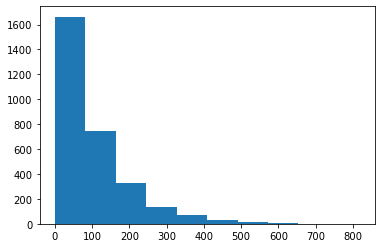

In [85]:
np.random.seed(42)

pop_data = np.random.gamma(1,100,3000)
plt.hist(pop_data);

`1.` In order to create the sampling distribution for the average of 3 draws of this distribution, follow these steps:

`a.` Use numpy's **random.choice** to simulate 3 draws from the `pop_data` array.   <br><br>
`b.` Compute the mean of these 3 draws. <br><br>
`c.` Write a loop to simulate this process 10,000 times, and store each mean into an array called **means_size_3**.<br><br>
`d.` Plot a histogram of your sample means.<br><br>
`e.` Use **means_size_3** and **pop_data** to answer the quiz questions below.

---

In [86]:
# a
sample3 = np.random.choice(pop_data, 3)


# b
mean_sample3 = sample3.mean()
mean_sample3

34.86585877838206

In [96]:
# c mean of samples
means_samples_3 = np.array([np.random.choice(pop_data, 3).mean() for _ in np.arange(10000)])

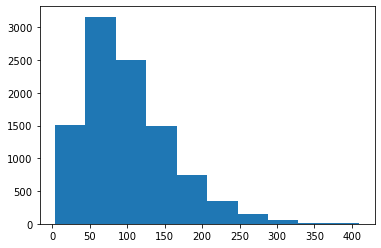

In [97]:
_ = plt.hist(means_samples_3)

In [98]:
# mean of the sampling distribution
mean_sample_means = means_samples_3.mean()
mean_sample_means

100.89818628053945

In [108]:
# variance of sample means with size 3
var_sample_means_3 = means_samples_3.var()
var_sample_means_3

3441.3760460409253

In [105]:
# population mean
mean_pop = pop_data.mean()
mean_pop

100.35978700795846

In [103]:
# standard deviation of the sampling distribution - SE
std_samples = means_samples_3.std()
std_samples

58.66324271672105

In [104]:
# standard deviation of population
std_pop = pop_data.std()
std_pop

99.77860187968906

In [107]:
# variance of population
var_pop = pop_data.var()
var_pop

9955.76939306549

In [109]:
print("{} -- population mean.\n{} -- mean of sample means with size 3.\n".format(mean_pop, mean_sample_means))
print("{} -- population variance divided by sample size 3.\n{} -- varince of sample means with size 3".format(var_pop/3, \
                                                                                                              var_sample_means_3))

100.35978700795846 -- population mean.
100.89818628053945 -- mean of sample means with size 3.

3318.5897976884967 -- population variance divided by sample size 3.
3441.3760460409253 -- varince of sample means with size 3


### Part II: with sample size of 100

`1.` In order to create the sampling distribution for the average of 100 draws of this distribution, follow these steps:

`a.` Use numpy's **random.choice** to simulate 100 draws from the `pop_data` array.   <br><br>
`b.` Compute the mean of these 100 draws. <br><br>
`c.` Write a loop to simulate this process 10,000 times, and store each mean into an array called **means_size_100**.<br><br>
`d.` Plot a histogram of your sample means.<br><br>
`e.` Use **means_size_100** and **pop_data** to answer the quiz questions below.

In [159]:
def sample_distribution(size, data):
    np.random.seed(42)
    sample_means = np.array([np.random.choice(data, size, replace=True).mean() for _ in range(10000)])
    mean_pop = data.mean()
    var_pop = data.var()
    mean_sample_means = sample_means.mean()
    var_sample_means = sample_means.var()
    print("====Sample Size: {}====".format(size))
    print("{} -- population mean.\n{} -- mean of sample means.\n".format(mean_pop, mean_sample_means))
    print("""{} -- population variance divided by sample size.
{} -- variance of sample means.""".format(var_pop/size, var_sample_means))
    print()
    plt.hist(sample_means, alpha=.5);
    
    

====Sample Size: 100====
100.35978700795846 -- population mean.
100.4559477159841 -- mean of sample means.

99.55769393065489 -- population variance divided by sample size.
97.48138300463255 -- variance of sample means.



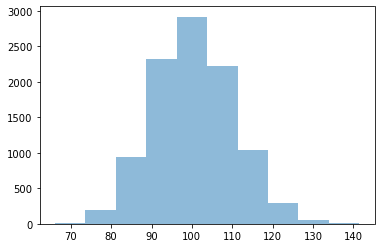

In [164]:
np.random.seed(42)
pop_data = np.random.gamma(1, 100, 3000)

sample_distribution(100, pop_data)

### Larger Sample Size

====Sample Size: 200====
100.35978700795846 -- population mean.
100.38092400799661 -- mean of sample means.

49.778846965327446 -- population variance divided by sample size.
49.38928456044491 -- variance of sample means.

====Sample Size: 500====
100.35978700795846 -- population mean.
100.36345399542053 -- mean of sample means.

19.91153878613098 -- population variance divided by sample size.
20.513669800632773 -- variance of sample means.

====Sample Size: 1000====
100.35978700795846 -- population mean.
100.35577975651691 -- mean of sample means.

9.95576939306549 -- population variance divided by sample size.
10.031207354294082 -- variance of sample means.



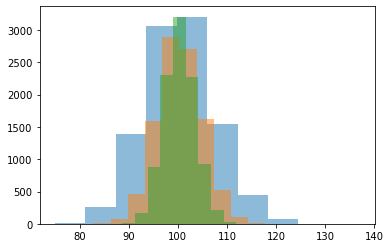

In [152]:
for size in [200, 500, 1000]:
    sample_distribution(size, pop_data)

[Back](#contents)

<a id="sa_dis"></a>
## Sampling Distribution

### Demo 1. Use numpy to make simulations on ***Sampling Distribution***

Below is an array that represents the students in a coffee-drinking survey experiment, where 1 represents the students that drink coffee, and 0 represents the students that do not drink coffee.

In [36]:
np.random.seed(42)
students = np.array([1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0])

`1.` Find the proportion of students who drink coffee in the above array. Store this value in a variable **p**.

In [37]:
p = students.mean()
p

0.7142857142857143

`2.` Use numpy's **random.choice** to simulate 5 draws from the `students` array.  What is proportion of your sample drink coffee?

In [38]:
sample_5 = np.random.choice(students, 5, replace=True)
sample_5.mean()

0.6

`3.` Repeat the above to obtain 10,000 additional proportions, where each sample was of size 5.  Store these in a variable called `sample_props`.

In [39]:
samples_5 = np.array([np.random.choice(students, 5, replace=True).mean() for _ in np.arange(10000)])
samples_5[:10]

array([0.6, 0.4, 0.4, 0.8, 1. , 0.8, 0.4, 0.4, 0.6, 1. ])

`4.` What is the mean proportion of all 10,000 of these proportions?  This is often called **the mean of the sampling distribution**.

In [40]:
mean_samples_5 = samples_5.mean()
mean_samples_5

0.714

<font color='red'>The sample mean seems quite close to **population mean**.</font>

`5.` What are the variance and standard deviation for the original 21 data values?

In [41]:
var_students = np.var(students)
var_students

0.20408163265306126

In [42]:
std_students = np.std(students)
std_students

0.45175395145262565

`6.` What are the variance and standard deviation for the 10,000 proportions you created?

In [43]:
var_samples_5= np.var(samples_5)
var_samples_5

0.041763999999999996

In [44]:
std_samples_5 = np.std(samples_5)
std_samples_5

0.2043624231604235

`7.` Compute p(1-p), which of your answers does this most closely match? (`p`is the mean of the original set (**population**) calculated at the first step.)

In [45]:
p*(1-p)

0.20408163265306123

<font color='red'>As we can see, `p(1-p)` most closely matches with the **variance of the population**.</font>

`8.` Compute p(1-p)/n, which of your answers does this most closely match? (`n` is the number of the sample, i.e. n=5) Compare the result with the answer to `Q6`.

In [46]:
p*(1-p)/5  # var_samples_5 = 0.041763999999999996

0.04081632653061225

As we can see, the result from above most closely matches with the <font color='red'>sample variance of size 5, i.e. **Standard Error**</font>.

`9.` The answer to `8.` is commonly called the **variance of the sampling distribution**.  Next change the first sample to be 20, what would this do for the variance of the sampling distribution?  Simulate and calculate the new answers in `6.` and `8.` to check that the consistency you found before still holds.

In [48]:
samples_20 = np.array([np.random.choice(students, 20, replace=True).mean() for _ in np.arange(10000)])

In [50]:
mean_samples_20 = samples_20.mean()
mean_samples_20  # population mean p=0.7142857142857143

0.71372

<font color='red'>As expected, it is quite close to the **population mean**.</font>

In [52]:
var_samples_20 = samples_20.var()
var_samples_20

0.0103752616

In [54]:
# compare the result above with the follows.
p*(1-p)/20

0.010204081632653062

Next, let's pick up a sample with **sample size 50**.

In [59]:
# sample size with 50
samples_50 = np.array([np.random.choice(students, 50, replace=True).mean() for _ in range(10000)])

# sample mean
mean_samples_50 = samples_50.mean()

# sample variance
var_samples_50 = samples_50.var()

# p(1-p)/50
from_pop = p*(1-p)/50

print("{} -- Mean of sample means with sample size 50.".format(mean_samples_50))
print("{} -- Mean of the population.".format(p))
print()
print("{} -- Variance of sample means with sample size 50.".format(var_samples_50))
print("{} -- Variance deriviated from population.".format(from_pop))

0.7136380000000001 -- Sample Mean with sample size 50.
0.7142857142857143 -- Mean of the population.

0.0041340449559999996 -- Sample Variance with sample size 50.
0.004081632653061225 -- Variance deriviated from population.


`10.` Finally, plot a histgram of the 10,000 draws from both the proportions with a sample size of 5 and the proportions with a sample size of 20.  Each of these distributions is a sampling distribution.  One is for the proportions of sample size 5 and the other a sampling distribution for proportions with sample size 20.

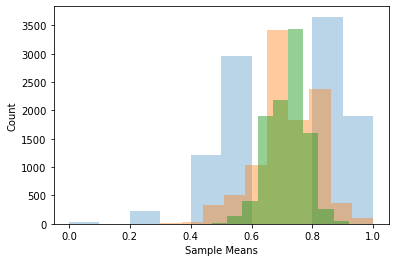

In [64]:
_ = plt.hist(samples_5, alpha=.3)
_ = plt.hist(samples_20, alpha=.4)
_ = plt.hist(samples_50, alpha=.5)
_ = plt.xlabel("Sample Means")
_ = plt.ylabel("Count")

<font color='red'>**Notice: as sample size increases, the sampling distribution becomes more '___compact___'.**</font>

### Beyond Binomial Distribution

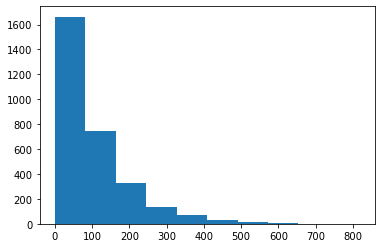

In [165]:
np.random.seed(42)

# Generate data from gamma distribution
pop_data = np.random.gamma(1,100, 3000)

plt.hist(pop_data);

In [166]:
sample_size = 100

samples_n = np.array([np.random.choice(pop_data, sample_size, replace=True).mean() for _ in range(10000)])

mean_samples_n = samples_n.mean()
mean_pop = pop_data.mean()
var_pop = pop_data.var()

print("{0} -- mean of sample means with sample size {2}.\n{1} -- population mean\n".format(mean_samples_n, \
                                                                                        mean_pop, sample_size))
print("{0} -- variance of sample means with sample size {2}.\n{1} -- population variance divided by sample size.\n".format(samples_n.var(), \
                                                                                                                        var_pop/sample_size, \
                                                                                                                        sample_size))



100.45928252074191 -- mean of sample means with sample size 100.
100.35978700795846 -- population mean

99.45980537084546 -- variance of sample means with sample size 100.
99.55769393065489 -- population variance divided by sample size.



### <font color='blue'>Important Conclusions</font>

- a sample mean, regardless of its size, it always approximates to **population mean.**


- $p*(1-p)$, equals to the **variance of population.**


- $\frac{p*(1-p)}{n}$, in which n is sample size, equals to the **variance of the samples.**, namely,

$
\begin{align}
\hat{\sigma}^2 = \frac{p*(1-p)}{n}
\end{align}
$

---

<a id="cd_prob"></a>
## Conditional Probability & Bayes Rules

**1. Total Probability**

$
\begin{align}
P(T) = P(T|D) \cdot P(D) + P(T|\neg D) \cdot P(\neg D)
\end{align}
$

*where T: Test, D: Disease, $\neg$D: Disease Free*

<br>

**2. Conditional Probability**
$
\begin{align}
P(A|B) = \frac{P(A \cap B)}{P(B)}
\end{align}
$

For example,  
$
\begin{align}
P(positive|disease) =  \frac{P(positive \cap disease)}{P(disease)}
\end{align}
$

where | represents "given" and **$\cap\$** represents "and".

<font color=red>$P(positive \cap disease)$ </font>is also called <font color=red>**Total Probability**</font> (and can also be written as <font color=red>$P(positive, disease)$</font>).

<br>

**Terminology**

- $P(A)$ means "the probability of A"  
- $P(\neg A)$ means "the probability of NOT A"  
- $P(A,B)$ means "the probability of A **and** B"  
- $P(A|B)$ means "the probability of A **given** B.  

[Back](#contents)

<a id="by_rule"></a>
## Bayes Rule

Take an example for illustration.

### Terminology

- **Prior Probability**

$
P(cancer) = 0.01
$  

**Normalizer** (also a **prior probability**):

$
P(pos) = P(pos|cancer) \cdot P(cancer) + P(pos|\neg cancer) \cdot P(\neg cancer)
$

<br>

- **Posterior Probability**

$
\begin{align}
P(cancer|pos) = \frac{P(pos, cancer)}{P(pos)}
\end{align}
$

<br>

- **Total Probability**

$
P(pos, cancer) = P(pos|cancer) \cdot P(cancer)
$

$
P(pos, \neg cancer) = P(pos|\neg cancer) \cdot P(\neg cancer)
$

***Note:***  
$P(pos, cancer)$ or $P(pos, \neg cancer)$ also known as $P(pos \cap cancer)$ or $P(pos \cap \neg cancer)$

<br>

- **Sensitivity**

$
P(pos|cancer) = 0.9
$

<br>

- **Specificity**

$
P(neg|\neg cancer)=0.9
$


### Calculation Procedure

**Formula**

$
\begin{align}
P(cancer|pos) = \frac{P(pos \cap cancer)}{P(pos)}
\end{align}
$

***Step 1: Calculate the $P(pos \cap cancer)$ or $P(pos, cancer)$***
 
$
P(pos \cap cancer) = P(pos|cancer) \cdot P(cancer) = P(sensitivity) \cdot P(prior)
$

<br>

***Step 2: Calculate the $P(pos \cap \neg cancer)$ or $P(pos, \neg cancer)$***

$
P(pos \cap \neg cancer) = P(pos|\neg cancer) \cdot P(\neg cancer) = (1-P(specificity)) \cdot (1-P(prior))
$

<br>

***Step 3: Calculate the $P(pos)$ -- normalization***

$
P(pos) = P(pos \cap cancer) + P(pos \cap \neg cancer) = P(sensitivity) \cdot P(prior) + (1-P(specificity)) \cdot (1-P(prior))
$

<br>

***Step 4: Calculate the posterior probability $P(cancer|pos)$***

$
\begin{align}
P(cancer|pos) = \frac{P(pos \cap cancer)}{P(pos)} = \frac{P(sensitivity) \cdot P(prior)}{P(sensitivity) \cdot P(prior) + (1-P(specificity)) \cdot (1-P(prior))}
\end{align}
$

In [2]:
def posterior_prob(prior, sensitivity, specificity):
    """
    Calculate the posterior probability after the interference of an event.
    """
    return prior*sensitivity/(prior*sensitivity+(1-specificity)*(1-prior))

### Example 1: Sebastian at home

<img src=sebastian_at_home_BayesRule.png>

### Quiz 1

Suppose you have a bag with **three standard** 6-sided dice with face values `[1,2,3,4,5,6]` and **two non-standard** 6-sided dice with face values `[2,3,3,4,4,5]`. Someone draws a die from the bag, rolls it, and announces it was a 3. What is the probability that the die that was rolled was a **standard die**?

<img src='quiz1.png' width=500 align='left'>

In [6]:
p_std_prior = 3/5
sensi = 1/6
speci = 2/3

In [7]:
p_std_given_3 = posterior_prob(p_std_prior, sensi, speci)
p_std_given_3

0.42857142857142855

[Back](#contents)

In [121]:
np.sqrt(1234)

35.12833614050059

In [123]:
'-' in [chr(i) for i in range(33, 127)]

True

In [199]:
def nearest_square(num):
    root = 0
    while (root+1)**2 <= num:
        root += 1
        
    return root**2

In [204]:
nearest_square(-2)

0

In [207]:
from sklearn.metrics import confusion_matrix

In [208]:
confusion_matrix?

In [209]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
tn, fp, fn, tp

(0, 2, 1, 1)

In [211]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
cm = confusion_matrix(y_true, y_pred)
cm
# array([[2, 0, 0],
#        [0, 0, 1],
#        [1, 0, 2]])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [214]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])
# array([[2, 0, 0],
#        [0, 0, 1],
#        [1, 0, 2]])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [215]:
confusion_matrix(y_true, y_pred, labels=["bird","ant", "cat"])

array([[0, 0, 1],
       [0, 2, 0],
       [0, 1, 2]])

In [238]:
y_true = [1,1,1,1,1,1,1,0,0,0,0,0,0,0]
y_pred = [1,1,1,1,1,1,0,0,0,0,0,0,1,1]

cm = confusion_matrix(y_true, y_pred, labels=[1,0])

tp, fn, fp, tn = cm.ravel()
tp, fn, fp, tn
print(" True Positive:", tp)
print("False Negative:", fn)
print("False Positive:", fp)
print(" True Negative:", tn)

cm_df = pd.DataFrame(cm, index=['Positive', 'Negative'], columns=['Pred_positive', 'Pred_negative'])
cm_df

 True Positive: 6
False Negative: 1
False Positive: 2
 True Negative: 5


,Pred_positive,Pred_negative
Positive,6,1
Negative,2,5


In [239]:
472/(472+284335)

0.0016572626375053984

In [242]:
from sklearn.metrics import recall_score